# Projeto de Redes Complexas 

## Integrantes

- Akemi 
- Caio Vinicius de Oliveira, Nº USP: 11932272
- Emerson
- Juan Lucas Montanaro, Nº USP: 11912787

---------------------------------------------------------------------------

## Qual tipo de modelo é mais adequado para redes sociais?

Primeiro passo, considerando as três redes sociais abaixo:

- Adolescente : Cada nó é uma pessoa e as conexões ocorrem se ela se diz amiga de outra pessoa
- Facebook : Cada nó é um usuário e as conexões ocorrem se um usuário é amigo do outro
- Hamsterster : Cada nó é um usuário e as conexões ocorrem se um usuário é amigo do outro

Rodamos simulações em python utilizando os seguintes modelos:
- Barabási-Albert
- Erdős–Rényi
- Watts-Strogatz com probabilidades de reconexão iguais à 1.0, 0.5 e 0.01.

E por fim calculamos várias medidas características para essas redes simuladas, sendo elas:

- Grau Médio
- Assortatividade
- Coeficiente de Clusterização
- Transitividade
- Entropia de Shannon
- Média dos Menores Caminhos
- Média da Intermediação
- Ponto Central de dominância
- Diâmetro
- Métrica S
- Quantidade de Baricentros
- Excentricidade Média
- $\rho$(Grau do Nó, Grau Médio dos Vizinhos)
- $\rho$(Grau do Nó, Centralidade de Proximidade)
- $\rho$(Grau do Nó, Cliques do Nó)

### Setup de Bibliotecas

In [1]:
# importações
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import networkx as nx

import simulacao
from CONSTANTES import *

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score

import pandas as pd
import seaborn as sns

In [2]:
# executando as simulacoes:
# for modelo in SIMULE.keys():
#     simulacao.main(modelo)

### Leitura e Tratamento dos dados

In [3]:
# carregando os resultados das simulacoes:
df_ba = pd.read_csv('Modelo_BA.csv')
df_ba['Modelo'] = 'BA'
df_er = pd.read_csv('Modelo_ER.csv')
df_er['Modelo'] = 'ER'
df_ws_p10 = pd.read_csv('Modelo_WS_p10.csv')
df_ws_p10['Modelo'] = 'WS p=1'
df_ws_p05 = pd.read_csv('Modelo_WS_p05.csv')
df_ws_p05['Modelo'] = 'WS p=0.5'
df_ws_p01 = pd.read_csv('Modelo_WS_p01.csv')
df_ws_p01['Modelo'] = 'WS p=0.01'

# # completando possiveis NaNs:
# df_ba.interpolate(method='linear', axis=1, inplace=True)
# df_er.interpolate(method='linear', axis=1, inplace=True)
# df_ws_p10.interpolate(method='linear', axis=1, inplace=True)
# df_ws_p05.interpolate(method='linear', axis=1, inplace=True)
# df_ws_p01.interpolate(method='linear', axis=1, inplace=True)

# mostrando um exemplo:
df_ba.head()

,grau_medio,assortatividade,coef_clusterizacao,transitividade,entropia,media_dos_menores_caminhos,intermediacao_media,ponto_central_de_dominancia,diametro,metrica_s,qtd_baricentros,excentricidade_media,cor_grau_e_grau_medio_vizinhos,cor_grau_e_proximidade,cor_grau_e_cliques,Rede Social,Iteracao,Modelo
0,7.987397,-0.056606,0.018718,0.011938,3.312802,3.479665,0.000977,0.113967,6.0,3427632.0,1.0,4.878693,-0.108774,0.650769,0.996298,adolescente,1,BA
1,7.987397,-0.050957,0.018008,0.011753,3.309658,3.463649,0.000971,0.119740,6.0,3635505.0,1.0,4.803860,-0.101730,0.637272,0.995386,adolescente,2,BA
2,7.987397,-0.057677,0.020821,0.012347,3.287382,3.451669,0.000966,0.124035,6.0,3798102.0,1.0,4.815675,-0.102961,0.624279,0.994553,adolescente,3,BA
3,7.987397,-0.044562,0.019453,0.011743,3.319342,3.483961,0.000979,0.177898,6.0,3535641.0,1.0,4.845609,-0.092246,0.617089,0.992078,adolescente,4,BA
4,7.987397,-0.038519,0.016082,0.011806,3.335093,3.506900,0.000988,0.120544,6.0,3296363.0,1.0,4.879086,-0.091658,0.662412,0.992642,adolescente,5,BA


In [4]:
# definindo um unico dataframe com os resultados:
df = pd.concat([df_ba, df_er, df_ws_p10, df_ws_p05, df_ws_p01], axis=0, ignore_index=True)
del df_ba, df_er, df_ws_p10, df_ws_p05, df_ws_p01

print('Shape das simulacoes:', df.shape)
df.head()

Shape das simulacoes: (450, 18)


,grau_medio,assortatividade,coef_clusterizacao,transitividade,entropia,media_dos_menores_caminhos,intermediacao_media,ponto_central_de_dominancia,diametro,metrica_s,qtd_baricentros,excentricidade_media,cor_grau_e_grau_medio_vizinhos,cor_grau_e_proximidade,cor_grau_e_cliques,Rede Social,Iteracao,Modelo
0,7.987397,-0.056606,0.018718,0.011938,3.312802,3.479665,0.000977,0.113967,6.0,3427632.0,1.0,4.878693,-0.108774,0.650769,0.996298,adolescente,1,BA
1,7.987397,-0.050957,0.018008,0.011753,3.309658,3.463649,0.000971,0.119740,6.0,3635505.0,1.0,4.803860,-0.101730,0.637272,0.995386,adolescente,2,BA
2,7.987397,-0.057677,0.020821,0.012347,3.287382,3.451669,0.000966,0.124035,6.0,3798102.0,1.0,4.815675,-0.102961,0.624279,0.994553,adolescente,3,BA
3,7.987397,-0.044562,0.019453,0.011743,3.319342,3.483961,0.000979,0.177898,6.0,3535641.0,1.0,4.845609,-0.092246,0.617089,0.992078,adolescente,4,BA
4,7.987397,-0.038519,0.016082,0.011806,3.335093,3.506900,0.000988,0.120544,6.0,3296363.0,1.0,4.879086,-0.091658,0.662412,0.992642,adolescente,5,BA


### Rodando um PCA para as Variáveis de Interesse

In [5]:
X = df.drop(columns=['Rede Social', 'Iteracao', 'Modelo'])
y = df[['Modelo']]

# pca
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [6]:
print("Auto-valores:\n", pca.explained_variance_, '\n')
print("Auto-vetores:\n", pca.components_, '\n')
print("Variância explicada:\n", pca.explained_variance_ratio_)

Auto-valores:
 [5.86984037e+12 6.56934172e+04] 

Auto-vetores:
 [[ 1.11180439e-06  6.54538785e-09 -3.41605858e-09 -3.94254461e-09
   2.65146905e-07 -8.46270611e-06 -3.77262637e-09 -3.84550184e-08
  -2.31890389e-05  1.00000000e+00 -9.53608621e-10 -1.73714712e-05
   6.95569732e-09  5.48377453e-08  1.05077503e-09]
 [-5.20526251e-03  1.75221868e-05 -1.33491490e-04 -1.32565940e-04
  -1.99548277e-03  2.78494278e-01  1.19571760e-04  3.46457228e-04
   7.68462801e-01  3.01905375e-05  8.38411531e-05  5.76085303e-01
   5.34798214e-05 -5.58219080e-04  1.18759701e-04]] 

Variância explicada:
 [9.99999989e-01 1.11916870e-08]


In [7]:
# Tranformando X
X_pca = pca.transform(X)

# Visualizando
df_pca = pd.DataFrame(X_pca, columns = ['pc1','pc2'])
df_pca['Modelo'] = df['Modelo']

fig = px.scatter(df_pca, x='pc1', y='pc2', color='Modelo')
fig.show()

### Treinando um Classificador para a Rede em Questão

In [8]:
X = df_pca[['pc1','pc2']]
y = df_pca[['Modelo']]

model = RandomForestClassifier()
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

C:\Users\juanL\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\juanL\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\juanL\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\juanL\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of

In [9]:
# Results
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
#podemos melhorar

Accuracy: 0.89 (+/- 0.07)


In [10]:
model.fit(X,y)

C:\Users\juanL\AppData\Local\Temp\ipykernel_5676\1298606489.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier()

### Rodar as redes reais - transformar o PCA e fazer a predição para descobrir à qual modelo ela mais se adequa

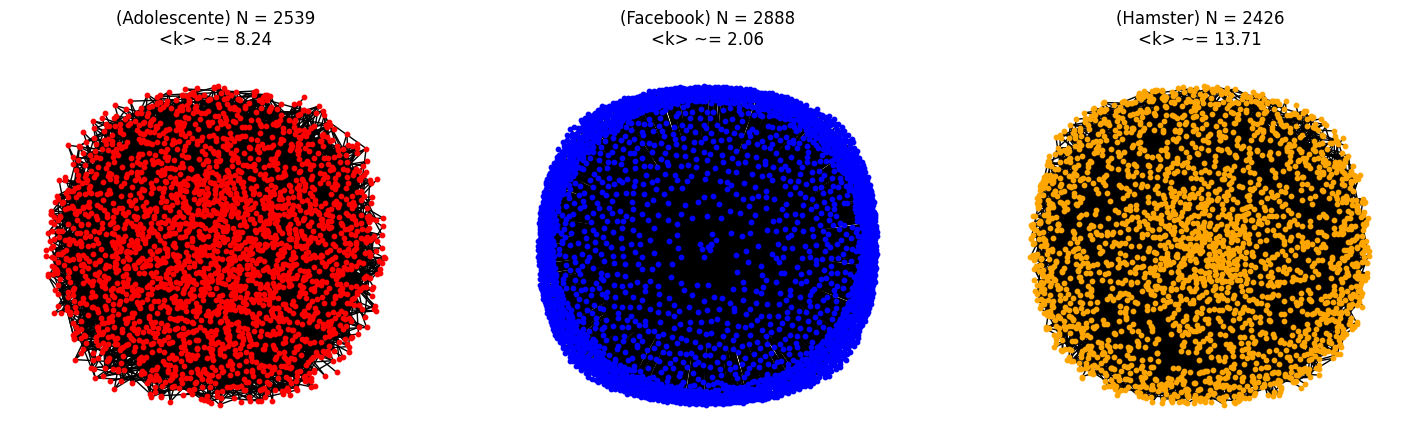

In [24]:
# carregando as redes reais:
adol = ler_rede('adolescente', grafo=True)
face = ler_rede('facebook', grafo=True)
hams = ler_rede('hamster', grafo=True)

# gerando um grafico de todas elas
plt.figure(figsize=(18, 5))

pos_a = nx.spring_layout(adol, iterations=30, k=0.3)
pos_f = nx.spring_layout(face, iterations=20, k=0.1)
pos_h = nx.spring_layout(hams, iterations=30, k=0.3)

plt.subplot(1, 3, 1)
nx.draw(adol, pos_a, node_color='red', node_size=10, with_labels=False)
plt.title(f'(Adolescente) N = {len(adol)}\n<k> ~= {grau_medio(adol):.2f}')

plt.subplot(1, 3, 2)
nx.draw(face, pos_f, node_color='blue', node_size=10, with_labels=False)
plt.title(f'(Facebook) N = {len(face)}\n<k> ~= {grau_medio(face):.2f}')

plt.subplot(1, 3, 3)
nx.draw(hams, pos_h, node_color='orange', node_size=10, with_labels=False)
plt.title(f'(Hamster) N = {len(hams)}\n<k> ~= {grau_medio(hams):.2f}')

plt.show()

In [19]:
# calculando as medidas para cada rede:
X_adol = pd.DataFrame(calcula_medidas(adol), index=[1])
X_face = pd.DataFrame(calcula_medidas(face), index=[2])
X_hams = pd.DataFrame(calcula_medidas(hams), index=[3])

# juntando tudo:
X_real = pd.concat([X_adol, X_face, X_hams], axis=0, ignore_index=True).head(2)
X_real.head()

,grau_medio,assortatividade,coef_clusterizacao,transitividade,entropia,media_dos_menores_caminhos,intermediacao_media,ponto_central_de_dominancia,diametro,metrica_s,qtd_baricentros,excentricidade_media,cor_grau_e_grau_medio_vizinhos,cor_grau_e_proximidade,cor_grau_e_cliques
0,8.235526,0.251286,0.146677,0.141888,4.055626,4.559388,0.001403,0.010862,10.0,1205668.0,1.0,7.515557,0.485549,0.753804,0.945545
1,2.064404,-0.668214,0.027247,0.000359,0.254405,3.867421,0.000994,0.548903,9.0,2298934.0,1.0,6.759695,-0.093737,0.116812,0.999966


In [20]:
x_real_pca = pd.DataFrame(pca.transform(X_real), columns=['pc1','pc2'])
x_real_pca

,pc1,pc2
0,-559503.841248,-114.301065
1,533762.158288,-82.651146


In [23]:
X_real['predict'] = model.predict(x_real_pca)
X_real

,grau_medio,assortatividade,coef_clusterizacao,transitividade,entropia,media_dos_menores_caminhos,intermediacao_media,ponto_central_de_dominancia,diametro,metrica_s,qtd_baricentros,excentricidade_media,cor_grau_e_grau_medio_vizinhos,cor_grau_e_proximidade,cor_grau_e_cliques,predict
0,8.235526,0.251286,0.146677,0.141888,4.055626,4.559388,0.001403,0.010862,10.0,1205668.0,1.0,7.515557,0.485549,0.753804,0.945545,WS p=0.01
1,2.064404,-0.668214,0.027247,0.000359,0.254405,3.867421,0.000994,0.548903,9.0,2298934.0,1.0,6.759695,-0.093737,0.116812,0.999966,WS p=1


### Conclusão